In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("IFND.csv", encoding='latin-1')
data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


# DATA PREPROCESSING 

In [3]:
data.isna().sum()

id               0
Statement        0
Image            0
Web              0
Category         0
Date         11321
Label            0
dtype: int64

## Removing punctuations from the text 

In [4]:
data['Statement']=data['Statement'].str.replace('[^\w\s]', '')
data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,WHO praises Indias Aarogya Setu app says it he...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,In Delhi Deputy US Secretary of State Stephen ...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions Chinas strategy behind deliberate...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief ministers mother passes away ...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


## Removing stopwords from text 

In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['Statement']=data['Statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,WHO praises Indias Aarogya Setu app says helpe...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,In Delhi Deputy US Secretary State Stephen Bie...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions Chinas strategy behind deliberate...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India signed 250 documents Space cooperation 5...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief ministers mother passes away 93,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


## Lemmatization

In [6]:
from nltk.stem import WordNetLemmatizer
l=WordNetLemmatizer()
data['Lemmatized_text']= data['Statement'].apply(lambda x: ' '.join([l.lemmatize(word) for word in x.split()]))
data.head()

,id,Statement,Image,Web,Category,Date,Label,Lemmatized_text
0,2,WHO praises Indias Aarogya Setu app says helpe...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE,WHO praise Indias Aarogya Setu app say helped ...
1,3,In Delhi Deputy US Secretary State Stephen Bie...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE,In Delhi Deputy US Secretary State Stephen Bie...
2,4,LAC tensions Chinas strategy behind deliberate...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE,LAC tension Chinas strategy behind deliberatel...
3,5,India signed 250 documents Space cooperation 5...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE,India signed 250 document Space cooperation 59...
4,6,Tamil Nadu chief ministers mother passes away 93,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE,Tamil Nadu chief minister mother pass away 93


## Removing unnecessary columns

In [7]:
data.drop(['id','Image','Web','Category','Date'],axis=1,inplace=True)
data.head()

,Statement,Label,Lemmatized_text
0,WHO praises Indias Aarogya Setu app says helpe...,TRUE,WHO praise Indias Aarogya Setu app say helped ...
1,In Delhi Deputy US Secretary State Stephen Bie...,TRUE,In Delhi Deputy US Secretary State Stephen Bie...
2,LAC tensions Chinas strategy behind deliberate...,TRUE,LAC tension Chinas strategy behind deliberatel...
3,India signed 250 documents Space cooperation 5...,TRUE,India signed 250 document Space cooperation 59...
4,Tamil Nadu chief ministers mother passes away 93,TRUE,Tamil Nadu chief minister mother pass away 93


# EDA

## Word cloud for TRUE news 

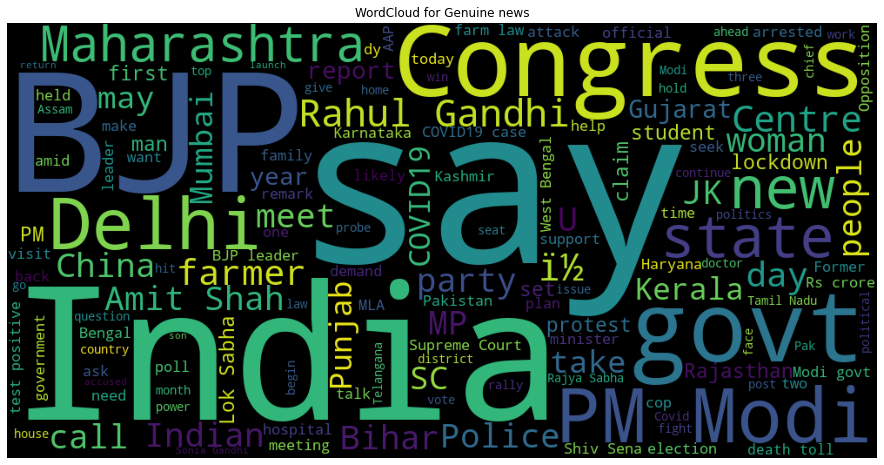

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')
True_wc = wc.generate(data[data['Label'] == 'TRUE']['Lemmatized_text'].str.cat(sep=' '))
plt.figure(figsize=(20,8))
plt.title("WordCloud for Genuine news")
plt.axis('off')
plt.imshow(True_wc)

## Word cloud for FAKE news

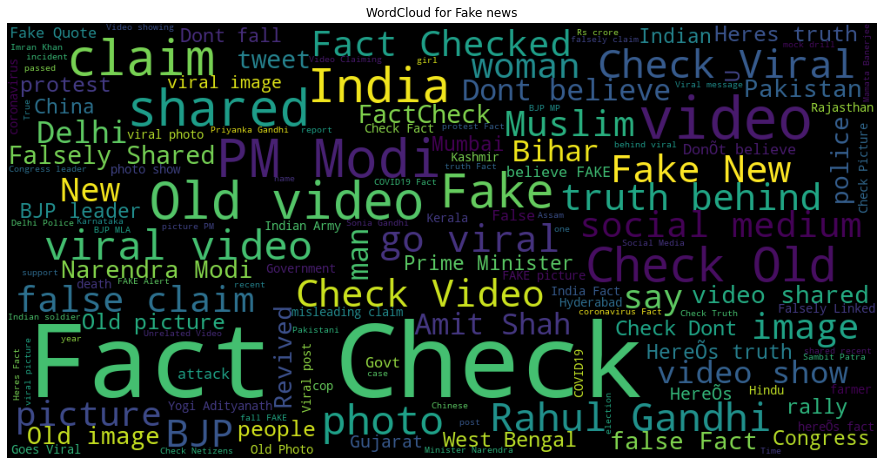

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')
Fake_wc = wc.generate(data[data['Label'] == 'Fake']['Lemmatized_text'].str.cat(sep=' '))
plt.figure(figsize=(20,8))
plt.title("WordCloud for Fake news")
plt.axis('off')
plt.imshow(Fake_wc)

## Count plot

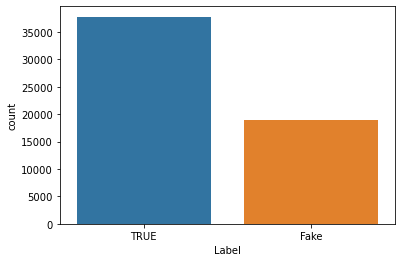

In [10]:
import seaborn as sns
sns.countplot(x ='Label', data = data)

### As evident from the above count plot , the dataset is balanced and this must be kept in mind while modelling

## Histogram for 50 most common words in TRUE news

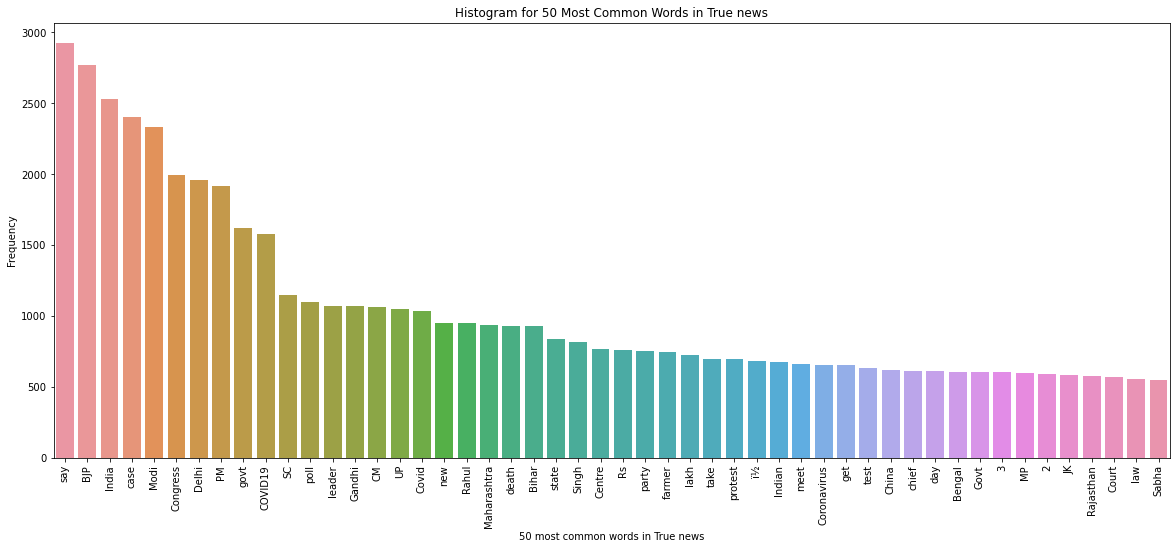

In [11]:
from collections import Counter
True_news = data[data['Label'] == 'TRUE']['Lemmatized_text'].values
True_words = " ".join(True_news).split()
True_word_counts = Counter(True_words)
common_True_words = True_word_counts.most_common(50)
plt.figure(figsize=(20,8))
sns.barplot(x=[word[0] for word in common_True_words], y=[word[1] for word in common_True_words] )
plt.xticks(rotation='vertical')
plt.xlabel('50 most common words in True news')
plt.ylabel('Frequency')
plt.title('Histogram for 50 Most Common Words in True news')
plt.show()

##  Histogram for 50 most common words in Fake news

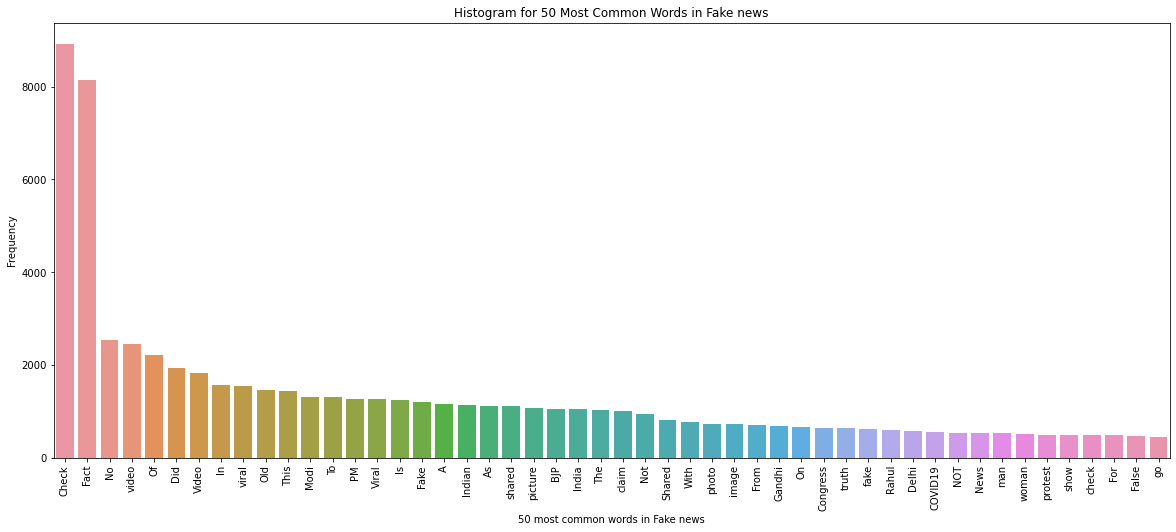

In [12]:
Fake_news = data[data['Label'] == 'Fake']['Lemmatized_text'].values
Fake_words = " ".join(Fake_news).split()
Fake_word_counts = Counter(Fake_words)
common_Fake_words = Fake_word_counts.most_common(50)
plt.figure(figsize=(20,8))
sns.barplot(x=[word[0] for word in common_Fake_words], y=[word[1] for word in common_Fake_words] )
plt.xticks(rotation='vertical')
plt.xlabel('50 most common words in Fake news')
plt.ylabel('Frequency')
plt.title('Histogram for 50 Most Common Words in Fake news')
plt.show()

# Encoding the target variable

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Label'] = lb.fit_transform(data['Label'])
data.head()

,Statement,Label,Lemmatized_text
0,WHO praises Indias Aarogya Setu app says helpe...,1,WHO praise Indias Aarogya Setu app say helped ...
1,In Delhi Deputy US Secretary State Stephen Bie...,1,In Delhi Deputy US Secretary State Stephen Bie...
2,LAC tensions Chinas strategy behind deliberate...,1,LAC tension Chinas strategy behind deliberatel...
3,India signed 250 documents Space cooperation 5...,1,India signed 250 document Space cooperation 59...
4,Tamil Nadu chief ministers mother passes away 93,1,Tamil Nadu chief minister mother pass away 93


## TF-IDF Vectorization 

In [14]:
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
"""count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(data['Lemmatized_text'])
freq_term_matrix = count_vectorizer.transform(data['Lemmatized_text'])
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)"""
X=data['Lemmatized_text']
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# MODELLING 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=data['Label']
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,y, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

94.87269906199309


In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf,y)
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, random_state=42)
logreg.fit(x_train_r, y_train_r)
Accuracy = logreg.score(x_test_r, y_test_r)
print(Accuracy*100)

95.87301587301587


In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_r,y_train_r)
Accuracy = dt.score(x_test_r, y_test_r)
print(Accuracy*100)

94.5079365079365


In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=10).fit(x_train_r, y_train_r)
Accuracy = clf.score(x_test_r, y_test_r)
print(Accuracy*100)

96.1957671957672
